In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

# Escolas

In [3]:
from extract_school import Extractor

In [4]:
school_extract = Extractor()
df_escolas = school_extract.data_transform()

/home/alisantos/Documentos/personal/data-escolas/extract_school.py:12: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(FILE_PATH, delimiter=';',encoding='latin-1')


In [5]:
df_escolas.sample(3)

,id_escola,regiao,estado,estado_sigla,municipio,escola,tipo_administracao,status_funcionamento,escola_urbana,especificacao_tipo_localizacao,endereco,endereco_numero,bairro,cep,data_inicio_ano_letivo,data_fim_ano_letivo,possui_agua_potavel,possui_energia_eletrica,possui_esgoto,possui_banheiro,possui_biblioteca,possui_tv,possui_tv_digital,possui_multimidia,possui_tablet_estudante,possui_acesso_internet,possui_acesso_internet_aprendizagem,qtde_docentes_ed_basica,qtde_docentes_ed_infantil,qtde_docentes_ed_fundamental,qtde_docentes_ensino_medio,qtde_psicologo_escolar,possui_turno_noturno,possui_matricula_ed_infantil,possui_matricula_ed_fundamental,possui_matricula_ensino_medio,possui_matricula_eja,qtde_matriculas_ed_basica,qtde_matriculas_ed_infantil,qtde_matriculas_ed_fundamental,qtde_matriculas_ensino_medio,qtde_matriculas_eja,qtde_matriculas_cor_raca_nao_declarada,qtde_matriculas_cor_raca_branca,qtde_matriculas_cor_raca_preta,qtde_matriculas_cor_raca_parda,qtde_matriculas_cor_raca_amarela,qtde_matriculas_cor_raca_indigena,endereco_completo
111399,31368318,Sudeste,Minas Gerais,MG,Brasília de Minas,COLEGIO SOLIDO - UNIDADE BRASILIA DE MINAS,Privada,Ativa,1,Sem especificação,RUA JOSEFINA PALMA,566,ROSARIO,39330000.0,14FEB2022:00:00:00,09DEC2022:00:00:00,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,37.0,3.0,24.0,20.0,1.0,0.0,1.0,1.0,1.0,0.0,186.0,15.0,116.0,55.0,0.0,29.0,46.0,1.0,110.0,0.0,0.0,"RUA JOSEFINA PALMA, 566, ROSARIO"
158455,35059511,Sudeste,São Paulo,SP,Indaiatuba,ROSINHA CANDELLO EMEB CRECHE,Municipal,Ativa,1,Sem especificação,JOAO MARTINI,925,JARDIM MORADA DO SOL,13348350.0,02FEB2022:00:00:00,23DEC2022:00:00:00,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,188.0,188.0,0.0,0.0,0.0,30.0,99.0,4.0,53.0,0.0,2.0,"JOAO MARTINI, 925, JARDIM MORADA DO SOL"
28092,21002479,Nordeste,Maranhão,MA,Bequimão,ESCOLA MUNICIPAL MIGUEL MARTINS LEMOS,Municipal,Ativa,0,Área de comunidade remanescente de quilombos,POVOADO ARIQUIPA,00,POVOADO ARIQUIPA,65248000.0,07MAR2022:00:00:00,30DEC2022:00:00:00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,1.0,11.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,150.0,18.0,91.0,0.0,41.0,45.0,0.0,42.0,63.0,0.0,0.0,"POVOADO ARIQUIPA, 00, POVOADO ARIQUIPA"


In [6]:
len(df_escolas)

224649

# Cidades

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
path_city = 'data/geojson/municipios.json'
gdf_cities = gpd.read_file(path_city)

# Análises

In [10]:
## Tipo de administracao
df_escolas.groupby('tipo_administracao').agg({'id_escola':'count'}).sort_values(by='id_escola', ascending=False)

,id_escola
tipo_administracao,
Municipal,132629
Privada,57825
Estadual,33460
Federal,735


In [20]:
escolas_agg = [df_escolas['tipo_administracao'] == 'Estadual']
escolas_agg = df_escolas.groupby('municipio').agg({'id_escola':'count'}).rename(columns={'id_escola':'total'}).reset_index()
#escolas_agg.hist(bins=1000)

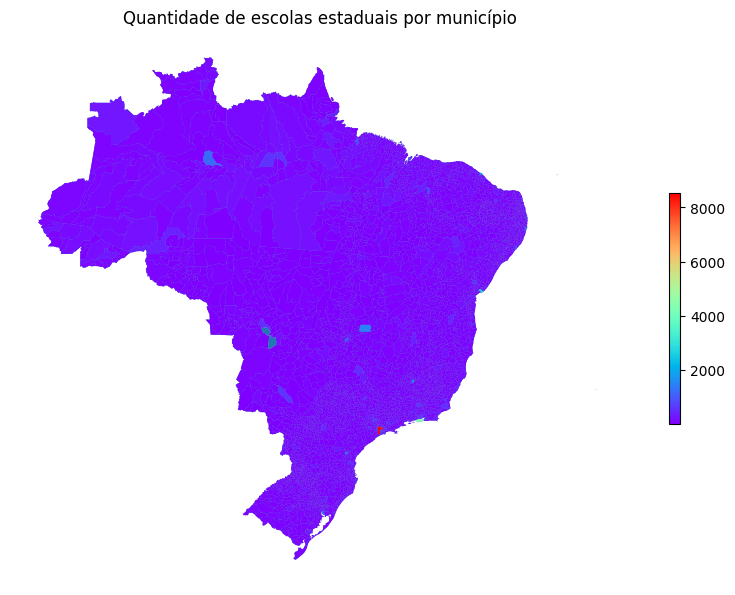

In [22]:
df = escolas_agg[['municipio','total']].merge(gdf_cities,left_on='municipio', right_on='cidade', how='left')
df = gpd.GeoDataFrame(df)

fig, ax = plt.subplots(figsize = (10,10))
gdf_cities.to_crs(epsg=4326).plot(ax=ax)#, color='lightgrey')
df.plot(column = 'total', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Quantidade de escolas estaduais por município')
ax.set_axis_off()
#plt.savefig('graficos/escolas_agua_potavel.png')

In [11]:
df_escolas.groupby('status_funcionamento').agg({'id_escola':'count'}).sort_values(by='id_escola', ascending=False)

,id_escola
status_funcionamento,
Ativa,184332
Paralisada,36526
Extinta,3791


In [30]:
var = 'escolas'

escolas_agg = df_escolas.groupby('municipio').agg({var:'mean'}).reset_index()

df = escolas_agg[['municipio',var]].merge(gdf_cities,left_on='municipio', right_on='cidade', how='left')
df = gpd.GeoDataFrame(df)

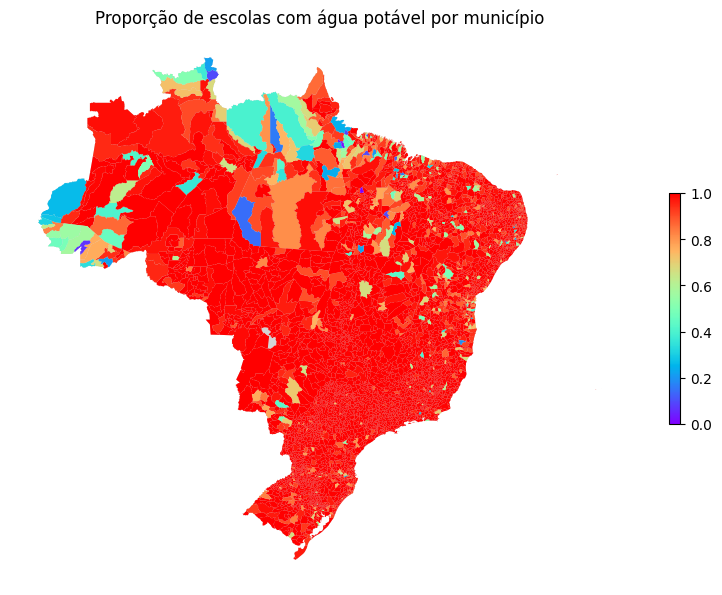

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
gdf_cities.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df.plot(column = var, ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Proporção de escolas com água potável por município')
ax.set_axis_off()
plt.savefig('graficos/escolas_agua_potavel.png')

In [ ]:
### Colocar fonte

In [ ]:
df = df.dropna()

In [29]:
df.sample(5)

,municipio,possui_agua_potavel,codarea,cidade,estado,geometry
4424,Santa Rita do Pardo,1.000000,5007554,Santa Rita do Pardo,Mato Grosso do Sul,"POLYGON ((-52.99730 -21.63250, -52.99650 -21.6..."
4870,São José do Rio Claro,1.000000,5107305,São José do Rio Claro,Mato Grosso,"POLYGON ((-56.41140 -13.83840, -56.40960 -13.8..."
3170,Mulungu,1.000000,2509800,Mulungu,Paraíba,"POLYGON ((-35.38040 -6.93250, -35.38140 -6.933..."
4698,Sorocaba,0.997696,3552205,Sorocaba,São Paulo,"POLYGON ((-47.30750 -23.56100, -47.30720 -23.5..."
85,Aliança do Tocantins,1.000000,1700350,Aliança do Tocantins,Tocantins,"POLYGON ((-48.95000 -11.51780, -48.94660 -11.5..."
